<a href="https://colab.research.google.com/github/venkat19-spec/Medical-Insurance-Cost-Prediction/blob/main/ML_PROJECT_HEALTHINSURANCE_PCA_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MACHINE LEARNING MTECH PROJECT: HEALTH INSURANCE COST PREDICTION **

> Members:
1. Aishwarya V - CB.EN.P2CSE2201
2. Mahakaleshwar P - CB.EN.P2CSE22007 
3. Venkatraman Ranganath - CB.EN.P2AIE22011

**ABOUT THE PROJECT:**

Health insurance is a necessity for every individual.The insurance offered varies from company to company because the importance given to few features are different from one another.


The aim of this project is to create an understanding of the prediction of the amount required for an individual based on their health.



**DATASET INFORMATION:**

Dimensions of Dataset: 1338 rows , 7 features

Features:
1.   age - Age of the person
2.   sex - Sex of the person
3.   bmi - Body mass Index of the person
4.   children - Number of children for the  person
5.   smoker - Does the person smoke?
6.   region - The region, the person is based of
7.   Charges - Medical Insurance per year for the person

#IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#DATA PREPROCESSING

In [ ]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)
df_clean = df_copy.copy()

In [ ]:
from sklearn.datasets import make_blobs

# X,y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

from sklearn.preprocessing import normalize
import pandas as pd

df_copy.replace(clean_data, inplace=True)
df_clean = df_copy.copy()
print("Cleaned Data")
print(df_clean.head())


Cleaned Data
   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_clean)
data_scaled = scaler.transform(df_clean)
data_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , ...,  1.97058663,
         1.34374564,  0.2985838 ],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.4388983 , -0.95368917],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.5074631 ,
         0.4388983 , -0.72867467],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.4388983 , -0.96159623],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34374564, -0.93036151],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.97058663,
        -1.37079638,  1.31105347]])

#1. PRINCIPAL COMPONENT ANALYSIS

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data_scaled)

PCA(n_components=2)

In [ ]:
X_pca = pca.transform(data_scaled)
print(data_scaled.shape)
print(X_pca.shape)
X_pca

(1338, 7)
(1338, 2)


array([[ 0.89500936, -0.81090766],
       [-1.12356175,  0.25981023],
       [-0.69275361,  0.56185666],
       ...,
       [-1.29969661,  0.53085374],
       [-1.54741603, -0.06449527],
       [ 2.21894244, -1.20921203]])

##PCA PLOT

Text(0, 0.5, 'Second Principal Component')

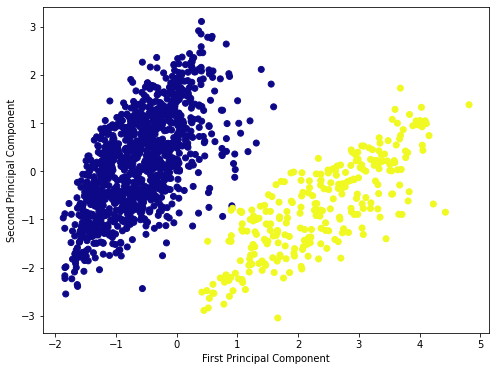

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c= df_copy['smoker'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

##PCA COMPONENTS

In [ ]:
# Each row represents a Principal component and columns relate back to the original features
pca.components_

array([[ 0.24472697, -0.10591693,  0.20582986,  0.07563882,  0.62499731,
         0.05671185,  0.69782898],
       [ 0.36291064,  0.00626083,  0.65180975,  0.08604162, -0.33389652,
         0.56473262, -0.07475112]])

##HEAT MAP & COLOR BAR

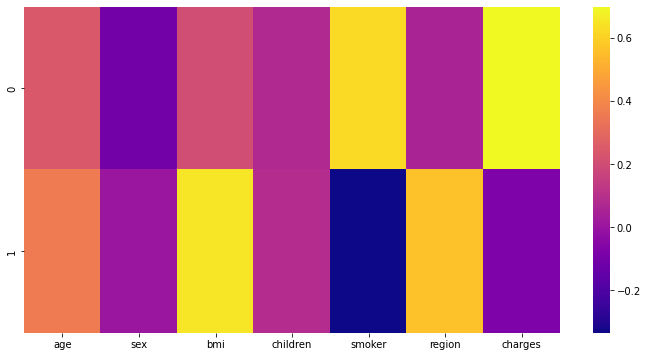

In [ ]:
# heat map and color bar represent the correlation between various features and the principal component itself
df_component = pd.DataFrame(pca.components_, columns = list(df.columns))
plt.figure(figsize = (12,6))
sns.heatmap(df_component, cmap = 'plasma')

#2. GAUSSIAN MIXTURE MODEL

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(X_pca)

GaussianMixture(n_components=3)

##GAUSSIAN PLOT

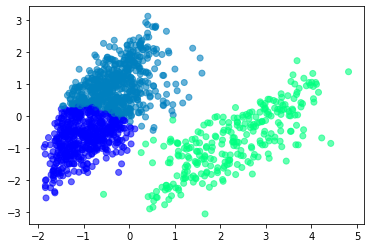

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1], c = gmm.fit_predict(X_pca), cmap = plt.cm.winter, alpha = 0.6)
plt.show()

##SILHOUETTE SCORE

Text(0, 0.5, 'Score')

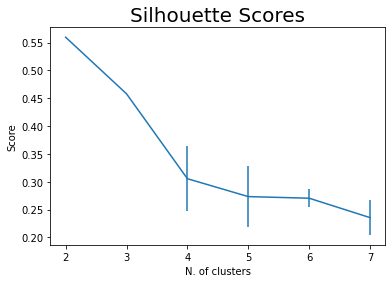

In [ ]:
# Silhouette score checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering
# Since we already know that the fitting procedure is not deterministic, we run twenty fits for each number of clusters,
#  then we consider the mean value and the standard deviation of the best five runs

def SelBest(arr:list, X:int)->list:
    # returns the set of X configurations with shorter distance
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_pca) 
        labels=gmm.predict(X_pca)
        sil=metrics.silhouette_score(X_pca, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

##DISTANCE BETWEEN TRAIN AND TEST GMM

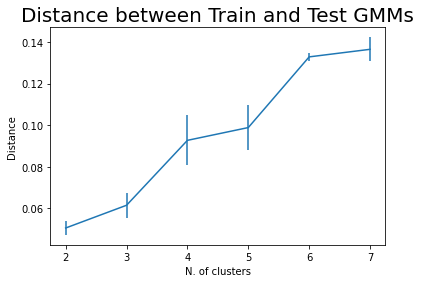

In [ ]:
# Lower the distance, better the cluster
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)
  
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_pca, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

##BIC SCORES

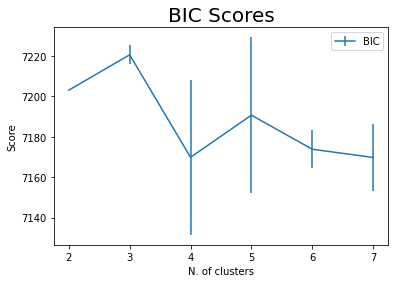

In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_pca) 
        
        tmp_bic.append(gmm.bic(X_pca))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

##GMM

In [ ]:
import seaborn as sns
sns.set()

##**CLUSTERING WITH THE HELP OF K-MEANS**

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std = 0.6, random_state=0)
X = X[:,::-1]

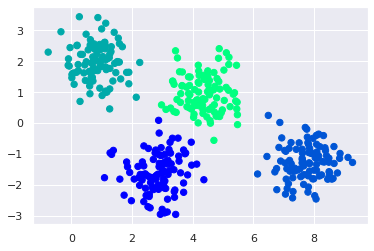

In [ ]:
from sklearn.cluster import KMeans 
kmeans = KMeans(4, random_state=0) 
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.winter);

##**VISUALIZING THE CLUSTER MODEL**

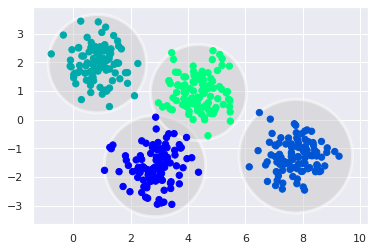

In [ ]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None): 
  labels = kmeans.fit_predict(X)
  
  # plot the input data 
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.winter, zorder=2)
  # plot the representation of the KMeans model 
  centers = kmeans.cluster_centers_
  radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))


kmeans = KMeans(n_clusters=4, random_state=0) 
plot_kmeans(kmeans, X)


###**INFERENCE : In k-means the cluster models must be circular. Thus if we take the data and transform it the cluster assignments end up becoming muddled**

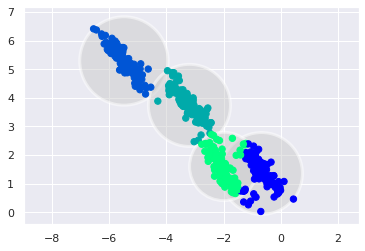

In [ ]:
rng = np.random.RandomState(13) 
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0) 
plot_kmeans(kmeans, X_stretched)

##**Generalizing E–M: Gaussian Mixture Models**

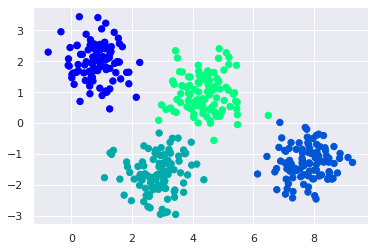

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X) 
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.winter);


In [ ]:
probs = gmm.predict_proba(X)
print( probs [ : 5] . round (3) )

[[0.    0.469 0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


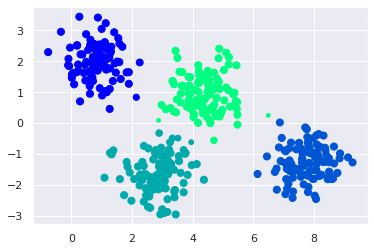

In [ ]:
size = 50 * probs.max(1) ** 2 # square emphasizes differences 
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.winter, s=size);

##**Visualizing the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output**

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
#Draw an e11lpse with a given posltlon and covar1anc e
  ax = ax or plt.gca()

  # Convert covariance to principal axes 
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s) 
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)

# Draw the Ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None): 
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.winter, zorder=2) 
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

##**4 component GMM**

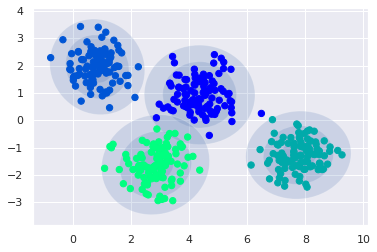

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42) 
plot_gmm(gmm, X)

##**4 component GMM model for stretched data**

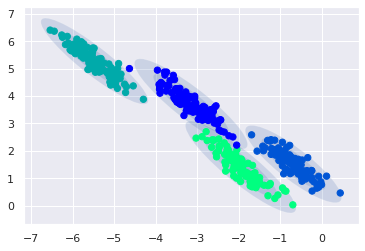

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

##**GMM as Density Estimation**

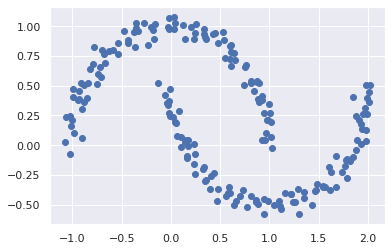

In [ ]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

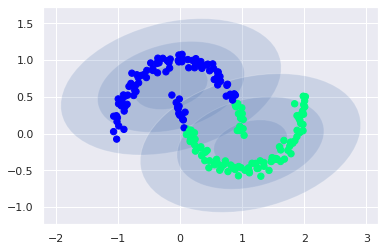

In [ ]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

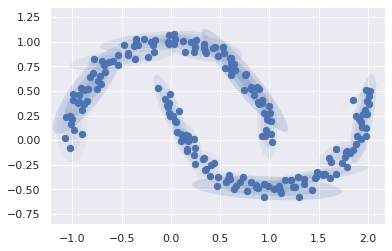

In [ ]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

###**Inference : If we increase the number of components and ignore the cluster labels, it will fit almost like that of input data**

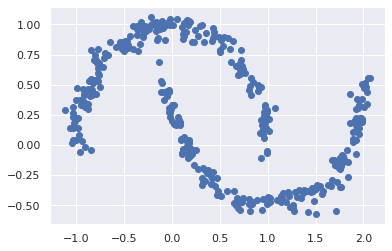

In [ ]:
Xnew,y = gmm16.sample(n_samples = 400)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

##**AIC and BIC as a function number of GMM components**

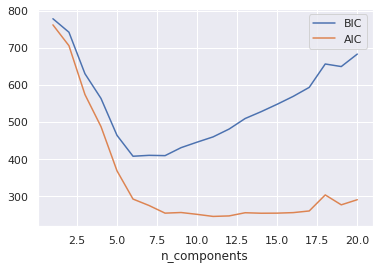

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');